# 2. EDA

This section regards the Explanatory Data Analysis, which consists in different parts:
- basic EDA on features
- insights on reviews and time periods
- sentiment - review relationship
- WordClouds
- N-gram analysis

In [199]:
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.stem  import WordNetLemmatizer
import cufflinks as cf

In [200]:
pd.set_option("max_colwidth", None)
plt.style.use('ggplot')

In [201]:
df = pd.read_csv('G:/Il mio Drive/MAGISTRALE/IT Coding/Project/Sentiment-Analysis-on-Amazon-product-reviews/Data/clean_reviews.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head(3)

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day
0,good sound seem decent build quality good sound happy purchase,good sound. seem decent build quality and good sound. very happy with purchase.,good sound,seem decent build quality and good sound. very happy with purchase.,5,Positive,2023,5,28
1,not realise bad audio setup considering used quite respectable setup many years ago feel trap using bluetooth speakers leave lot desired price provide perfect audio experience filling 3x3m room hardly auditorium quality amazing feel like subwoofer genres average listening experience without neighbours complaining beautiful almost brings tear eye,"i didn't realise how bad my audio setup was. considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",i didn't realise how bad my audio setup was,"considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",5,Positive,2023,5,27
2,beauty love compact shape sound,its a beauty. love its compact shape and sound,its a beauty,love its compact shape and sound,5,Positive,2023,5,26


- Review: title + content to maintain context and syntax
- Clean review: it is the Review column without emoticons, punctuation, special characters and most importantly without stopwords

## Exploratory Data Analysis

### Basic and quick EDA on some features

In [202]:
# column types
df.dtypes

Clean Review    object
Review          object
Title           object
Content         object
Rating           int64
Sentiment       object
Year             int64
Month            int64
Day              int64
dtype: object

In [203]:
# NA check
df.isna().sum()

Clean Review    0
Review          0
Title           0
Content         9
Rating          0
Sentiment       0
Year            0
Month           0
Day             0
dtype: int64

Looks like that with the .to_csv() conversion the empty contents are now Missing values. This does not bother me since my interested columns are Reviews and Clean Reviews, replacing the missing values with simply the title.

In [204]:
df[df['Content'].isna()]

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day
12,great deal,great deal..,great deal.,NaN,5,Positive,2023,5,7
53,impressive,impressive.,impressive,NaN,5,Positive,2023,3,4
78,loud clear audio,"loud, and very clear audio.","loud, and very clear audio",NaN,5,Positive,2022,12,29
167,awesome general balanced sound,awesome! general balanced sound!.,awesome! general balanced sound!,NaN,5,Positive,2022,6,24
291,great job presonus,great job presonus.,great job presonus,NaN,5,Positive,2021,10,29
296,amazing,amazing.,amazing,NaN,5,Positive,2021,10,17
387,best speakers ever owned,the best speakers i have ever owned.,the best speakers i have ever owned,NaN,5,Positive,2021,4,12
563,amazing sound best ever heard,amazing sound. best i have ever heard.,amazing sound. best i have ever heard,NaN,5,Positive,2020,5,7
601,good quality,good quality.,good quality,NaN,3,Neutral,2020,2,14


Looks like for the rest we have 0 missing values.

In [205]:
for col in df.columns:
    display(pd.DataFrame(df[col].describe()))
    print("\n")

,Clean Review
count,740
unique,739
top,excellent excellent
freq,2


,Review
count,740
unique,739
top,excellent. excellent
freq,2


,Title
count,740
unique,653
top,five stars
freq,9


,Content
count,731
unique,728
top,great product
freq,3


,Rating
count,740.000000
mean,4.481081
std,1.100335
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


,Sentiment
count,740
unique,3
top,Positive
freq,643


,Year
count,740.000000
mean,2020.718919
std,1.680717
min,2014.000000
25%,2020.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


,Month
count,740.000000
mean,6.325676
std,3.560517
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,12.000000


,Day
count,740.000000
mean,15.406757
std,8.798032
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,31.000000


On a total of 740 reviews, We have 653 unique titles and 728 unique review contents. The value **top** and **freq** in the categorical features describe() dataframes indicate the most frequent value and its frequency. Basically **'five Stars'** appears 9 times in the Title column.

In [206]:
# checking relative frequencies for each sentiment
df['Sentiment'].value_counts()/df.shape[0]

Positive    0.868919
Negative    0.089189
Neutral     0.041892
Name: Sentiment, dtype: float64

### Insights on reviews and time periods

In these next graphs I will present the number of reviews alng with their sentiment for each year, month and day. To make these histograms i grouped the review counts by year, month and day to then plot each value.

I assume that there will be no correlation between the time period and the sentiment, therefore the most impactful plots will be the first 3.

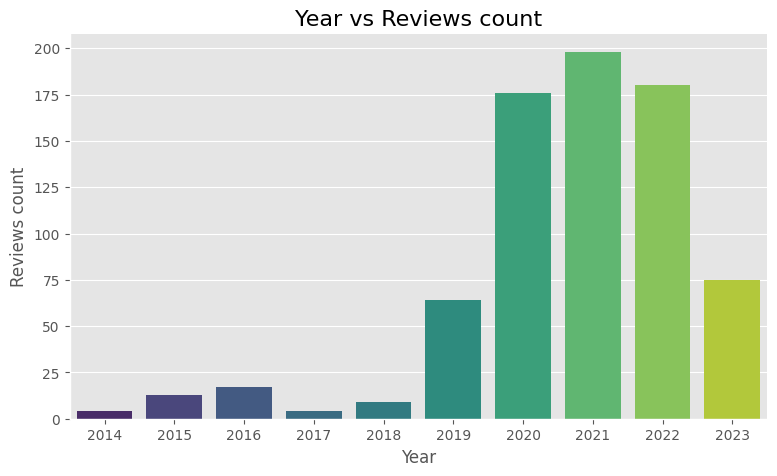

In [207]:
plt.figure(figsize=(9, 5))

year = pd.DataFrame(df.groupby('Year')['Review'].count()).reset_index()
year['Year'] = year['Year'].astype('int64')
year.sort_values(by=['Year'])

sns.barplot(x="Year", y="Review", data=year, palette='viridis', estimator=sum)
plt.title('Year vs Reviews count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)

sns.despine()  # Remove the top and right spines
plt.show()

From this barplot we deduct that the boom of the product has been between 2019 and 2020, even if there were some reviews from 2014 onwards. Obviously the 2023 reviews are much less than the other recent years.

Also, as a home product, the speakers saw an exponential increase in sales maybe due to the COVID-19 pandemic, and this led also to more reviews.

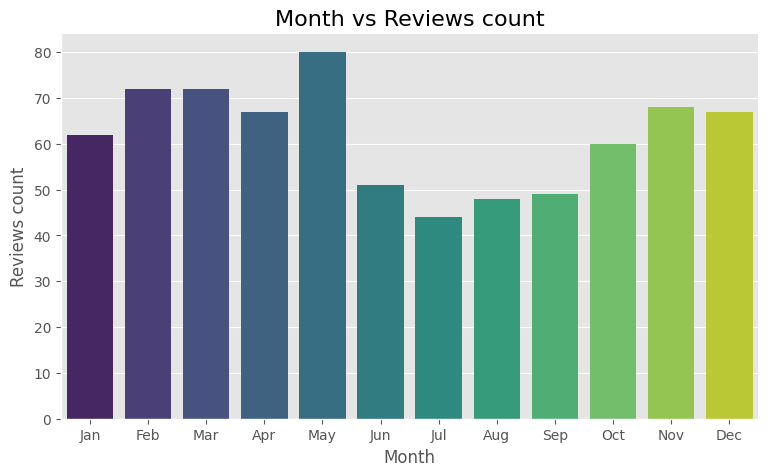

In [208]:
plt.figure(figsize=(9, 5))

month = pd.DataFrame(df.groupby('Month')['Review'].count()).reset_index()
month['Month'] = month['Month'].astype('int64')
month.sort_values(by=['Month'])
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.barplot(x="Month", y="Review", data=month, palette='viridis')
plt.title('Month vs Reviews count', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.xticks(range(len(month_labels)), month_labels)      # to put the labels

sns.despine()  # Remove the top and right spines
plt.show()

Looks like there tends to be less reviews during summer time!

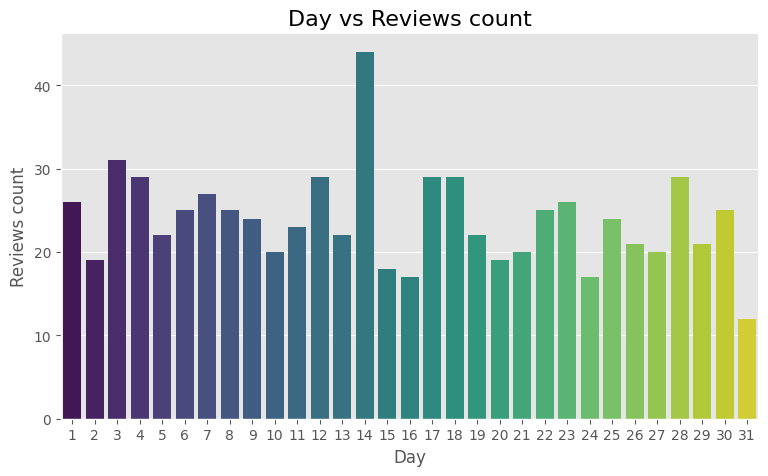

In [209]:
plt.figure(figsize=(9, 5))
day = pd.DataFrame(df.groupby('Day')['Review'].count()).reset_index()

sns.barplot(x="Day", y="Review", data=day, palette='viridis')
plt.title('Day vs Reviews count', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)

sns.despine()  # Remove the top and right spines
plt.show()

The review counts are more or less uniformly distributed, unless from the day 14 of the month. There isn't that much variance between the days. But there is a for sure a little drop at the end of month.

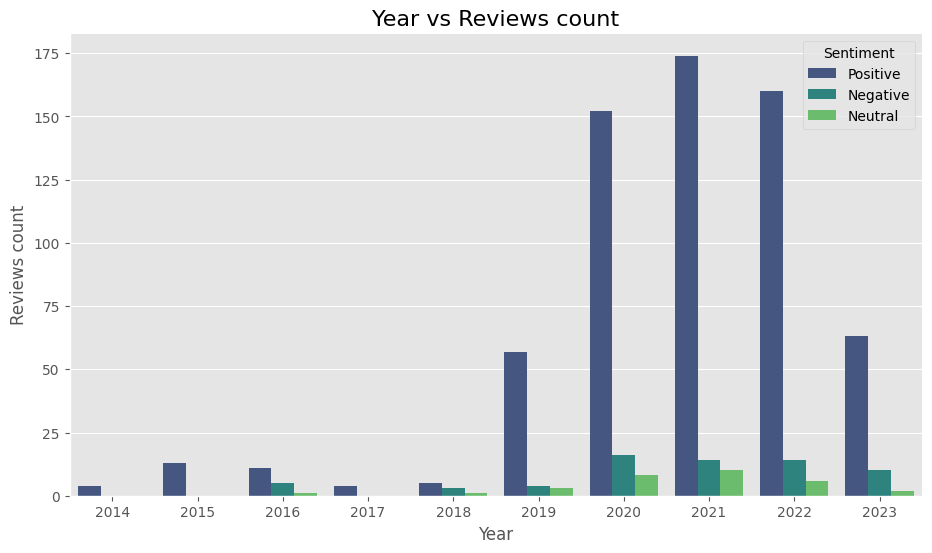

In [210]:
plt.figure(figsize=(11, 6))
Year = pd.DataFrame(df.groupby(['Year', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Year", y="Review", hue='Sentiment', data=Year, palette='viridis')
plt.title('Year vs Reviews count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)

sns.despine()  # Remove the top and right spines
plt.show()

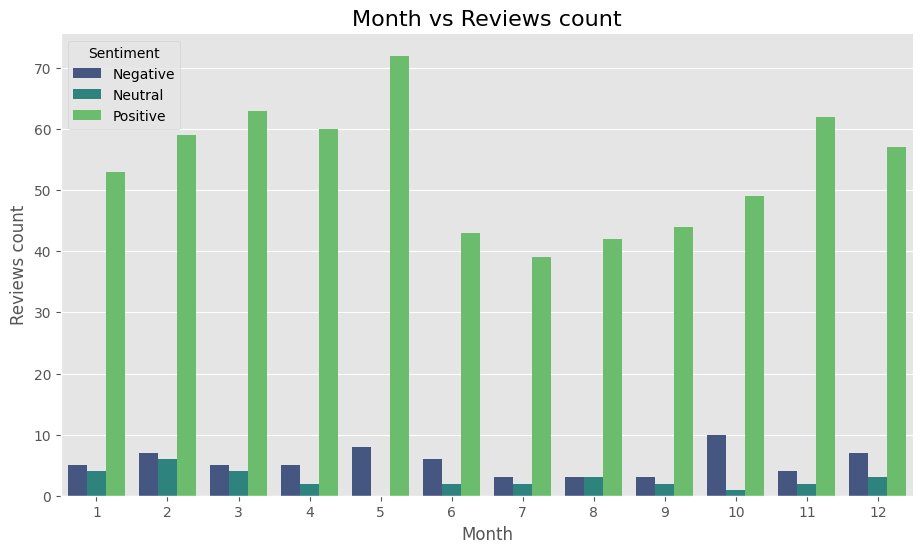

In [211]:
plt.figure(figsize=(11, 6))
Month = pd.DataFrame(df.groupby(['Month', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Month", y="Review", hue='Sentiment', data=Month, palette='viridis')
plt.title('Month vs Reviews count', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)

sns.despine()  # Remove the top and right spines
plt.show()

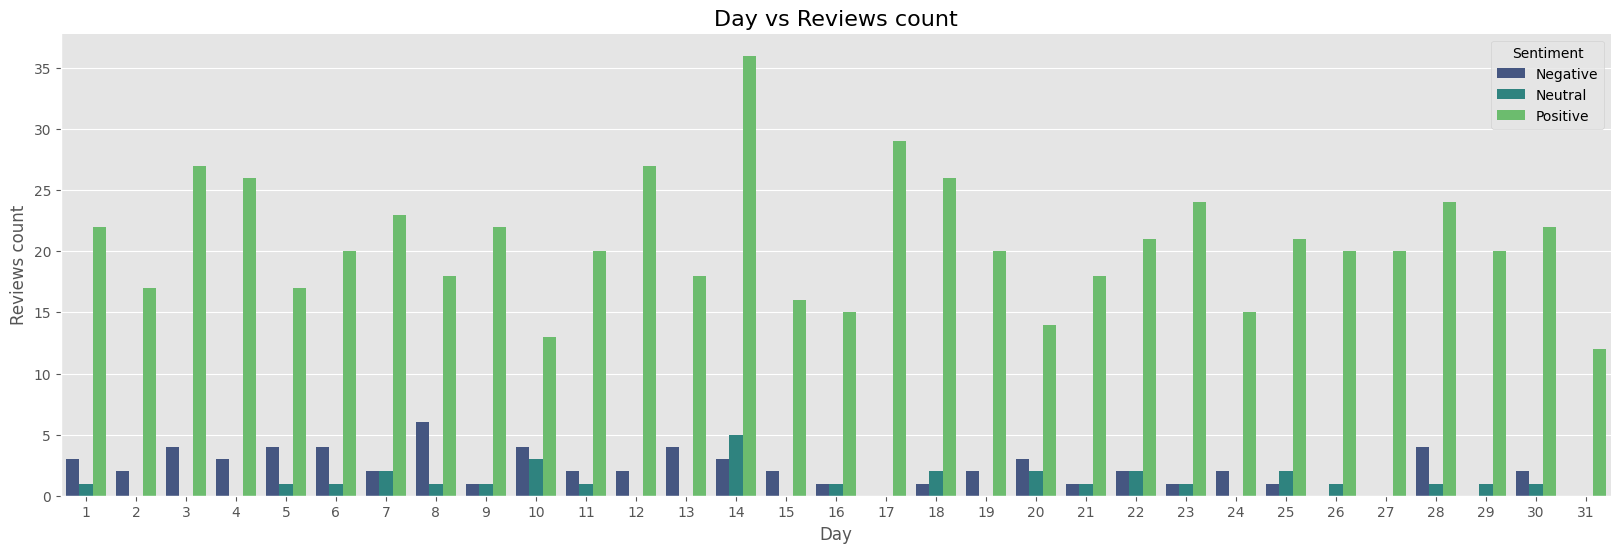

In [212]:
plt.figure(figsize=(20, 6))
day = pd.DataFrame(df.groupby(['Day', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Day", y="Review", hue='Sentiment', data=day, palette='viridis')
plt.title('Day vs Reviews count', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)

sns.despine()  # Remove the top and right spines
plt.show()

These plots confirm my initial assumption, showing that there is absolutely no correlation between the review's sentiment and the time in which the user writes the feedback.

### Sentiment - Review Relationship

I assume to find longer reviews for higher polarities: it means that a higly satisfied customer is more incline of writing a long and positive review, and the same thing for a customer which is highly unsatistifed with the product. This section is important since I will add some more features.

Let's see if my assumption is right.

Let's also investigate for which positive reviews the polarity is negative and viceversa (most likely ironic reviews).

**New features:**
- Polarity: Using TextBlob for figuring out the rate of sentiment. It is between [-1,1] where -1 is negative and 1 is positive polarity
- Review length: length of the review, which includes each letters and spaces
- Word length: how many words are there in every review (including emoticons and punctuation)

In [213]:
# TB = TextBlob Polarity
df['TB Polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Review Length'] = df['Review'].astype(str).apply(len)
df['Word Count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [214]:
df.head(2)

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day,TB Polarity,Review Length,Word Count
0,good sound seem decent build quality good sound happy purchase,good sound. seem decent build quality and good sound. very happy with purchase.,good sound,seem decent build quality and good sound. very happy with purchase.,5,Positive,2023,5,28,0.561111,79,13
1,not realise bad audio setup considering used quite respectable setup many years ago feel trap using bluetooth speakers leave lot desired price provide perfect audio experience filling 3x3m room hardly auditorium quality amazing feel like subwoofer genres average listening experience without neighbours complaining beautiful almost brings tear eye,"i didn't realise how bad my audio setup was. considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",i didn't realise how bad my audio setup was,"considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",5,Positive,2023,5,27,0.256481,521,94


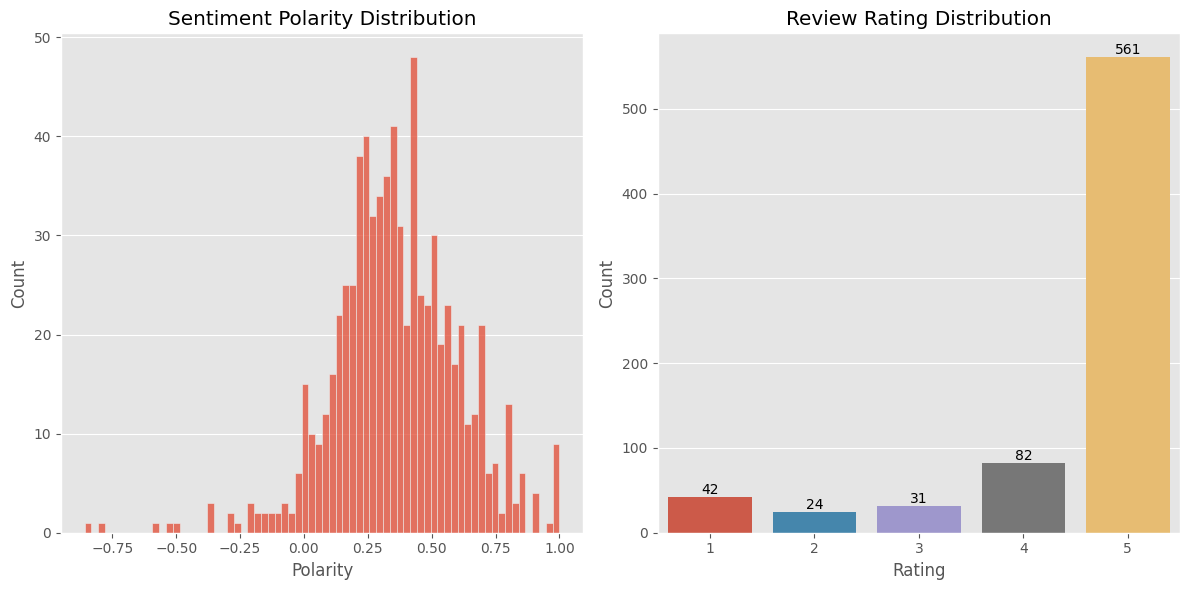

In [253]:
# Rating distribution along with Sentiment polarity (Textblob baseline)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Ratings
sns.countplot(x=df['Rating'], ax=axs[1])
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Count')
axs[1].set_title('Review Rating Distribution')
for i, count in enumerate(df['Rating'].value_counts().sort_index()):
    axs[1].annotate(count, (i, count), ha='center', va='bottom')

# Polarity
sns.histplot(df['TB Polarity'], bins=70, kde=False, ax=axs[0])
axs[0].set_xlabel('Polarity')
axs[0].set_ylabel('Count')
axs[0].set_title('Sentiment Polarity Distribution')
axs[0].grid(axis='x')

plt.tight_layout()
plt.show()

Very biased towards positive reviews.

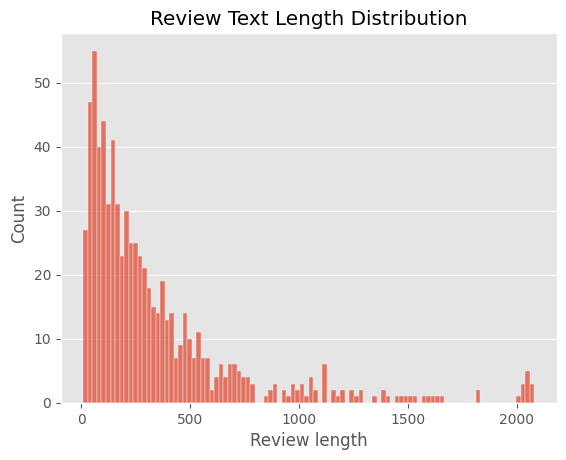

In [244]:
# Review Length Distribution
sns.histplot(df['Review Length'], bins=100)
plt.xlabel('Review length')
plt.ylabel('Count')
plt.title('Review Text Length Distribution')
plt.grid(axis='x')
plt.show()

Highly positively skewed distribution where most of the lengths falls between 0-500.

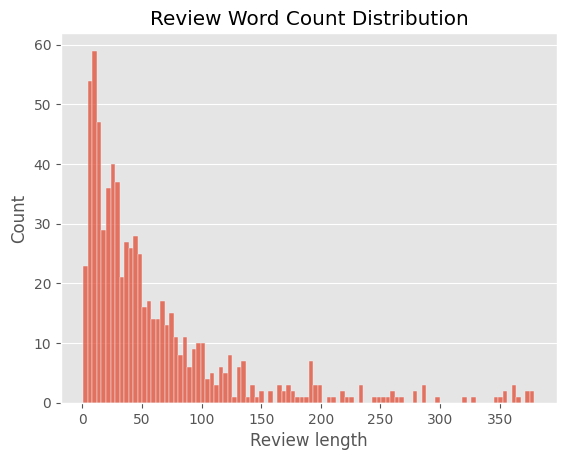

In [217]:
# Review word count Distribution
sns.histplot(df['Word Count'], bins=100)
plt.xlabel('Review length')
plt.ylabel('Count')
plt.title('Review Word Count Distribution')
plt.grid(axis='x')
plt.show()

As previously, but the reviews have on average 0 to 50 words.

In [218]:
# "ironic" reviews that could be difficult to interpret
# look at for example the first one: it is clearly ironic
df[(df['TB Polarity'] < 0) & (df['Rating'] >= 4)]

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day,TB Polarity,Review Length,Word Count
40,boom boom boom neighbours hate,"boom, boom. boom. neighbours hate it.","boom, boom. boom",neighbours hate it.,5,Positive,2023,3,23,-0.800000,37,6
68,adds boom boom bought complement set desktop eris e3 5 speakers sub hits hard loud turn gain way still borderline loud sometimes resolved issue turning overall system output volume turning speaker gain compensate recommend connecting sub speakers splitters source rather series encountered ground loop connected way,"adds the boom boom.. bought to complement a set of desktop eris e3.5 speakers...this sub hits hard and is very loud. i had to turn the gain all the way down and it's still borderline too loud sometimes. resolved the issue by turning the overall system output volume down and turning the speaker gain up to compensate...i'd recommend connecting the sub / speakers with y-splitters from your source rather than in series, i encountered a ground loop when connected that way.",adds the boom boom.,"bought to complement a set of desktop eris e3.5 speakers...this sub hits hard and is very loud. i had to turn the gain all the way down and it's still borderline too loud sometimes. resolved the issue by turning the overall system output volume down and turning the speaker gain up to compensate...i'd recommend connecting the sub / speakers with y-splitters from your source rather than in series, i encountered a ground loop when connected that way.",5,Positive,2023,1,16,-0.062130,472,81
108,proper amazing fun studio daily music listening logic pro x bass bit weird ngl professional mixes masters insane,"proper. amazing for fun studio or daily music listening, on logic pro x the bass is a bit weird ngl but on professional mixes and masters this is insane",proper,"amazing for fun studio or daily music listening, on logic pro x the bass is a bit weird ngl but on professional mixes and masters this is insane",5,Positive,2022,11,1,-0.081250,152,29
116,love speakers insane,love it!. this speakers are insane.,love it!,this speakers are insane.,5,Positive,2022,10,4,-0.187500,35,6
138,definitely adds oomph skeptical whether complement eris e5s definitely fills gap bad acoustic home studio,definitely adds oomph. was skeptical whether this would complement my eris e5s. but it definitely fills a gap in my bad acoustic home studio.,definitely adds oomph,was skeptical whether this would complement my eris e5s. but it definitely fills a gap in my bad acoustic home studio.,5,Positive,2022,8,26,-0.300000,141,24
203,presonus eris sub8 compact gorgeous looks average performance positive reviews product much looking forward hooking sub system however first disappointed sound quality general not deliver window rattling lound punchy low end base like reviewers suggested said addition sub actually drastically improve overall low end frequencies paired somewhat base shy presonus e3 5 satellite speakers reason recommend sub please not expect ear shatteringly loud punchy low end base not get system hooked pc small office space 5 x10 mainly play music need sub speakers set almost max hpf 180 deg swithes located rear unit make no difference sound whatsoever little disappointing volume control also located back people may also find tad inconvenient shocked playing sub satellite speakers turned lower frequency base notes sounded not quiet muffled distorted hoping nice loud punchy low end base not get said played together satellite speakers overall sound seem come life not put review overall sound pretty good money usually true say get pay,"presonus eris sub8 compact with gorgeous looks & average performance!. after all the positive reviews about this product, i was so much looking forward to hooking this sub up to my system. however, i was at first very disappointed with the sound quality in general, because it did not deliver the window rattling, lound, punchy, low-end base like some other reviewers had sugges

In [264]:
# in this case i expect a bigger dataset since the TextBlob polarity is not that good
# in fact
n = len(df[(df['TB Polarity'] > 0) & (df['Rating'] <= 2)])
print(f'We have {n} reviews which are not correctly "classified" as negative according to the polarity.')

We have 39 reviews which are not correctly "classified" as negative according to the polarity.


### WordClouds

In this section are presented 3 different WordClouds, one for each sentiment (Postive, Negative, Neutral). Which words are the most "popular" among every type of sentiment?

In [219]:
pos_reviews = df[df['Sentiment']=='Positive']['Clean Review']
pos_reviews = ". ".join(pos_reviews)

neu_reviews = df[df['Sentiment']=='Neutral']['Clean Review']
neu_reviews = ". ".join(neu_reviews)

neg_reviews = df[df['Sentiment']=='Negative']['Clean Review']
neg_reviews = ". ".join(neg_reviews)

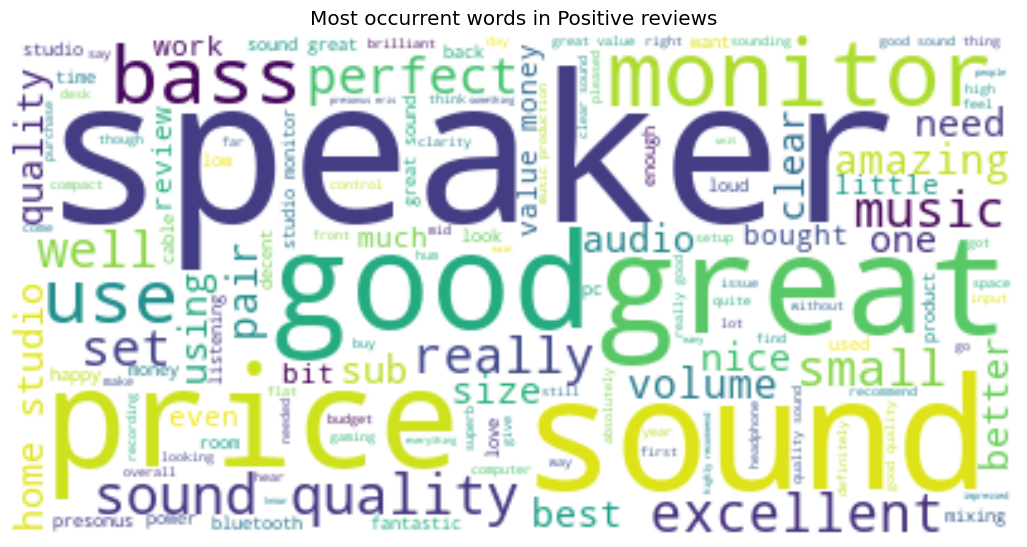

In [220]:
wordcloud = WordCloud(background_color="white", max_words=len(pos_reviews))
wordcloud.generate(pos_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Positive reviews")
plt.show()

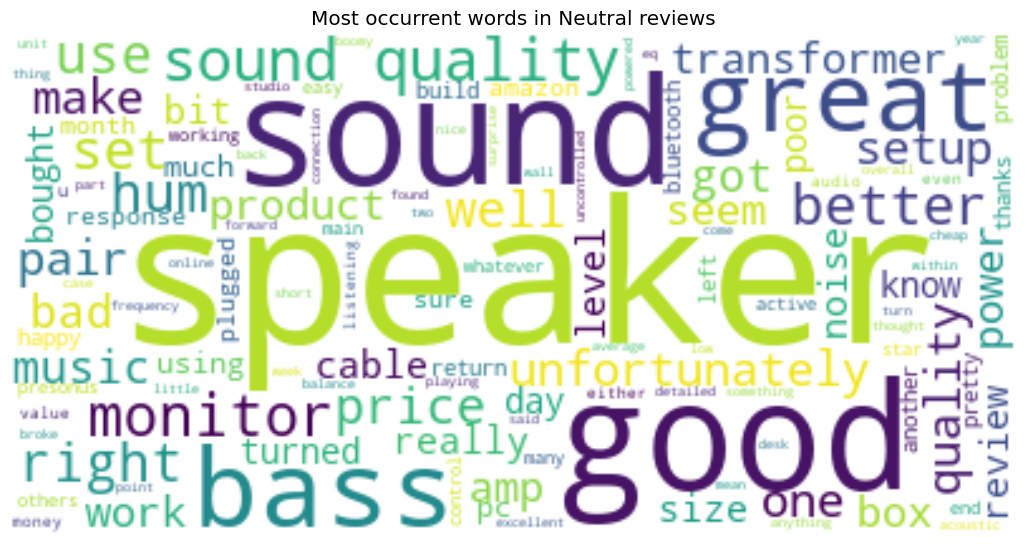

In [221]:
wordcloud = WordCloud(background_color="white", max_words=len(neu_reviews))
wordcloud.generate(neu_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Neutral reviews")
plt.show()

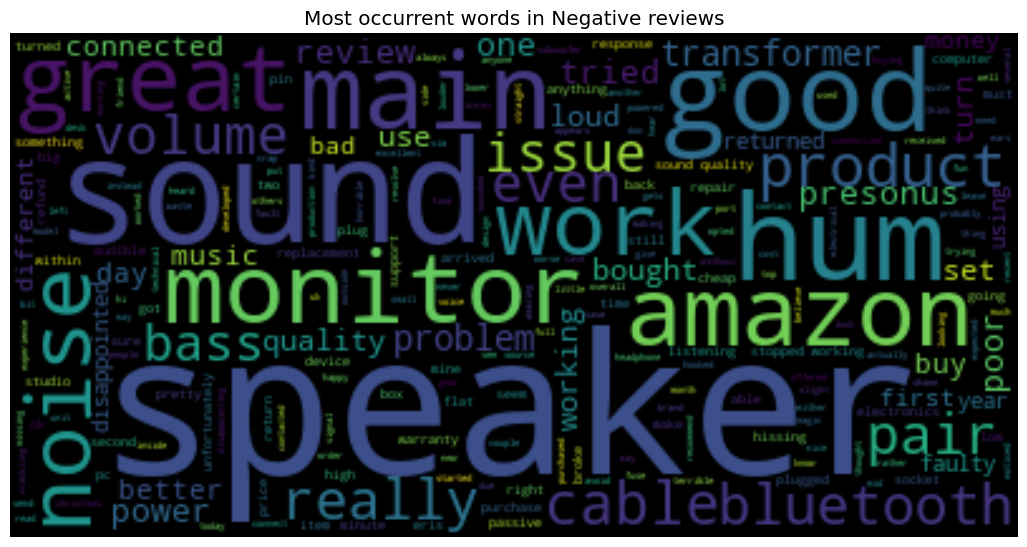

In [222]:
wordcloud = WordCloud(background_color="black", max_words=len(neg_reviews))
wordcloud.generate(neg_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Negative reviews")
plt.show()

### N-gram analysis

---

## NLTK

In [223]:
# nltk.download('vader_lexicon')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download("stopwords")
# nltk.download('tagsets')
# nltk.download('wordnet')

In [224]:
example = df['Content'][11]
print(example)

bought a pair of these for my daughter, so good i kept them and ordered another pair :-)


In [225]:
tokens = nltk.word_tokenize(example)
tokens

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'i',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

Tokenized result: basically to convert a sentence into a format which is understable by the computer a.k.a. feature vector. As we can see nltk is smart because it detects the won't word and splits it into 'wo' and "n't".

Now find the part of speech for each of these words:

In [226]:
tag = nltk.pos_tag(tokens)
tag

[('bought', 'VBD'),
 ('a', 'DT'),
 ('pair', 'NN'),
 ('of', 'IN'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('daughter', 'NN'),
 (',', ','),
 ('so', 'RB'),
 ('good', 'JJ'),
 ('i', 'NN'),
 ('kept', 'VBD'),
 ('them', 'PRP'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('another', 'DT'),
 ('pair', 'NN'),
 (':', ':'),
 ('-', ':'),
 (')', ')')]

What is the meaning of these tags?

In [227]:
# nltk.help.upenn_tagset()

These are the most important:

| Tag  | Meaning       |
|------|---------------|
| JJ   | Adjectives    |
| NN   | Nouns         |
| RB   | Adverbs       |
| PRP  | Pronouns      |
| VB   | Verbs         |

Putting now these tags - part of speech into entities.

In [228]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()       # pretty print nltk function

(S
  bought/VBD
  a/DT
  pair/NN
  of/IN
  these/DT
  for/IN
  my/PRP$
  daughter/NN
  ,/,
  so/RB
  good/JJ
  i/NN
  kept/VBD
  them/PRP
  and/CC
  ordered/VBD
  another/DT
  pair/NN
  :/:
  -/:
  )/))


**LEMMATIZING:**  A lemma is a word that represents a whole group of words, so lemmatizing consists in reducing  words to their core meaning (doing -> do).

In [229]:
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [230]:
lemmatizer.lemmatize("bought")

'bought'

In [231]:
lemmatized_example = [lemmatizer.lemmatize(token) for token in tokens]
lemmatized_example

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'i',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

In [232]:
tokens

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'i',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

----

## VADER


compound of vader is 10x bettere than the textblob polarities

In [233]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [234]:
sia

In [235]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

Compound is an aggregation of the 3, goes from -1 to 1.

In [236]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [237]:
print(example)
print(sia.polarity_scores(example))

bought a pair of these for my daughter, so good i kept them and ordered another pair :-)
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.722}


In [238]:
# run on entire dataset
results = {}
for row in df:
    # text = row['Content']
    # Id = row
    # results['Id'] = sia.polarity_scores(text)
    print(row)

Clean Review
Review
Title
Content
Rating
Sentiment
Year
Month
Day
TB Polarity
Review Length
Word Count


In [239]:
# run on entire dataset
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Content']
    Id = i
    results[Id] = sia.polarity_scores(text)

  0%|          | 0/740 [00:00<?, ?it/s]

AttributeError: 'float' object has no attribute 'encode'

In [ ]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

Is this in line with what we expect? If the rating is 5-4, is the rating positive?

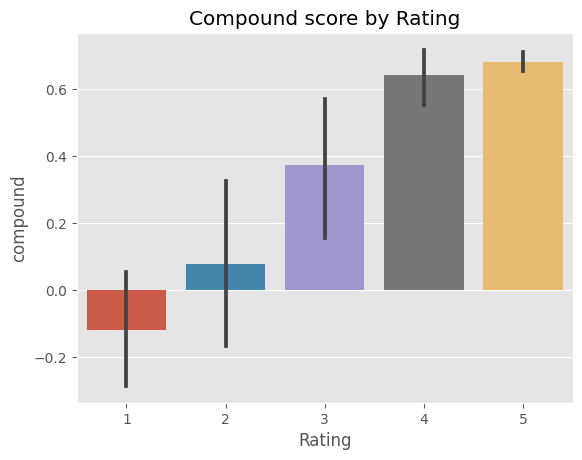

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound score by Rating')
plt.show()

It is what we would expect!

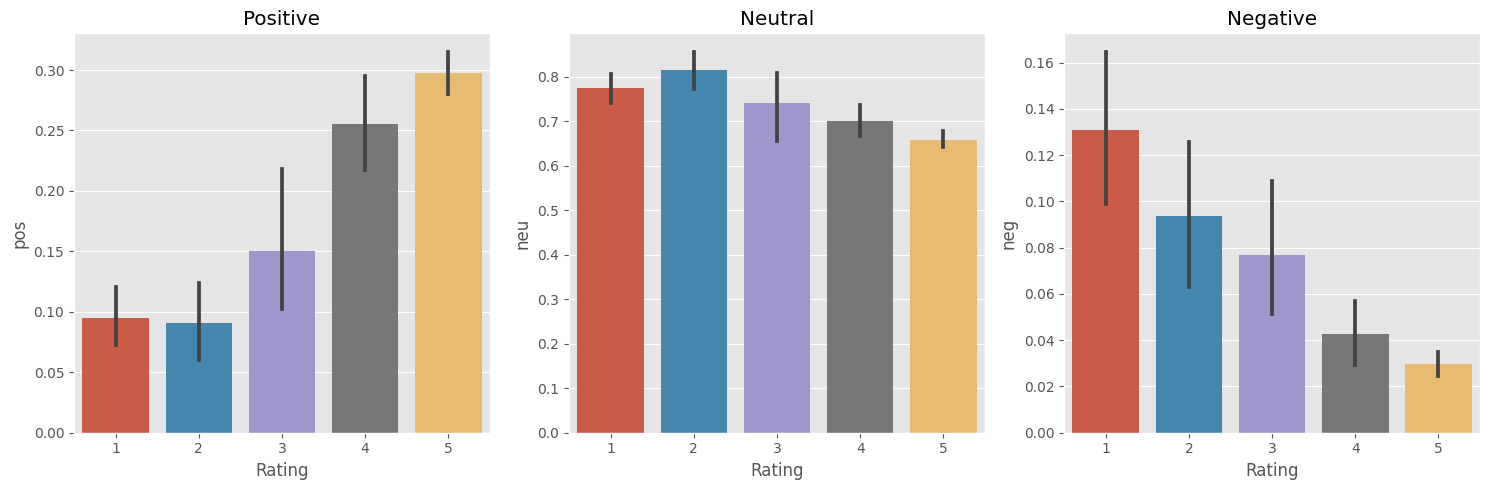

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = vaders, x='Rating', y='pos', ax = axs[0])
sns.barplot(data = vaders, x='Rating', y='neu', ax = axs[1])
sns.barplot(data = vaders, x='Rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

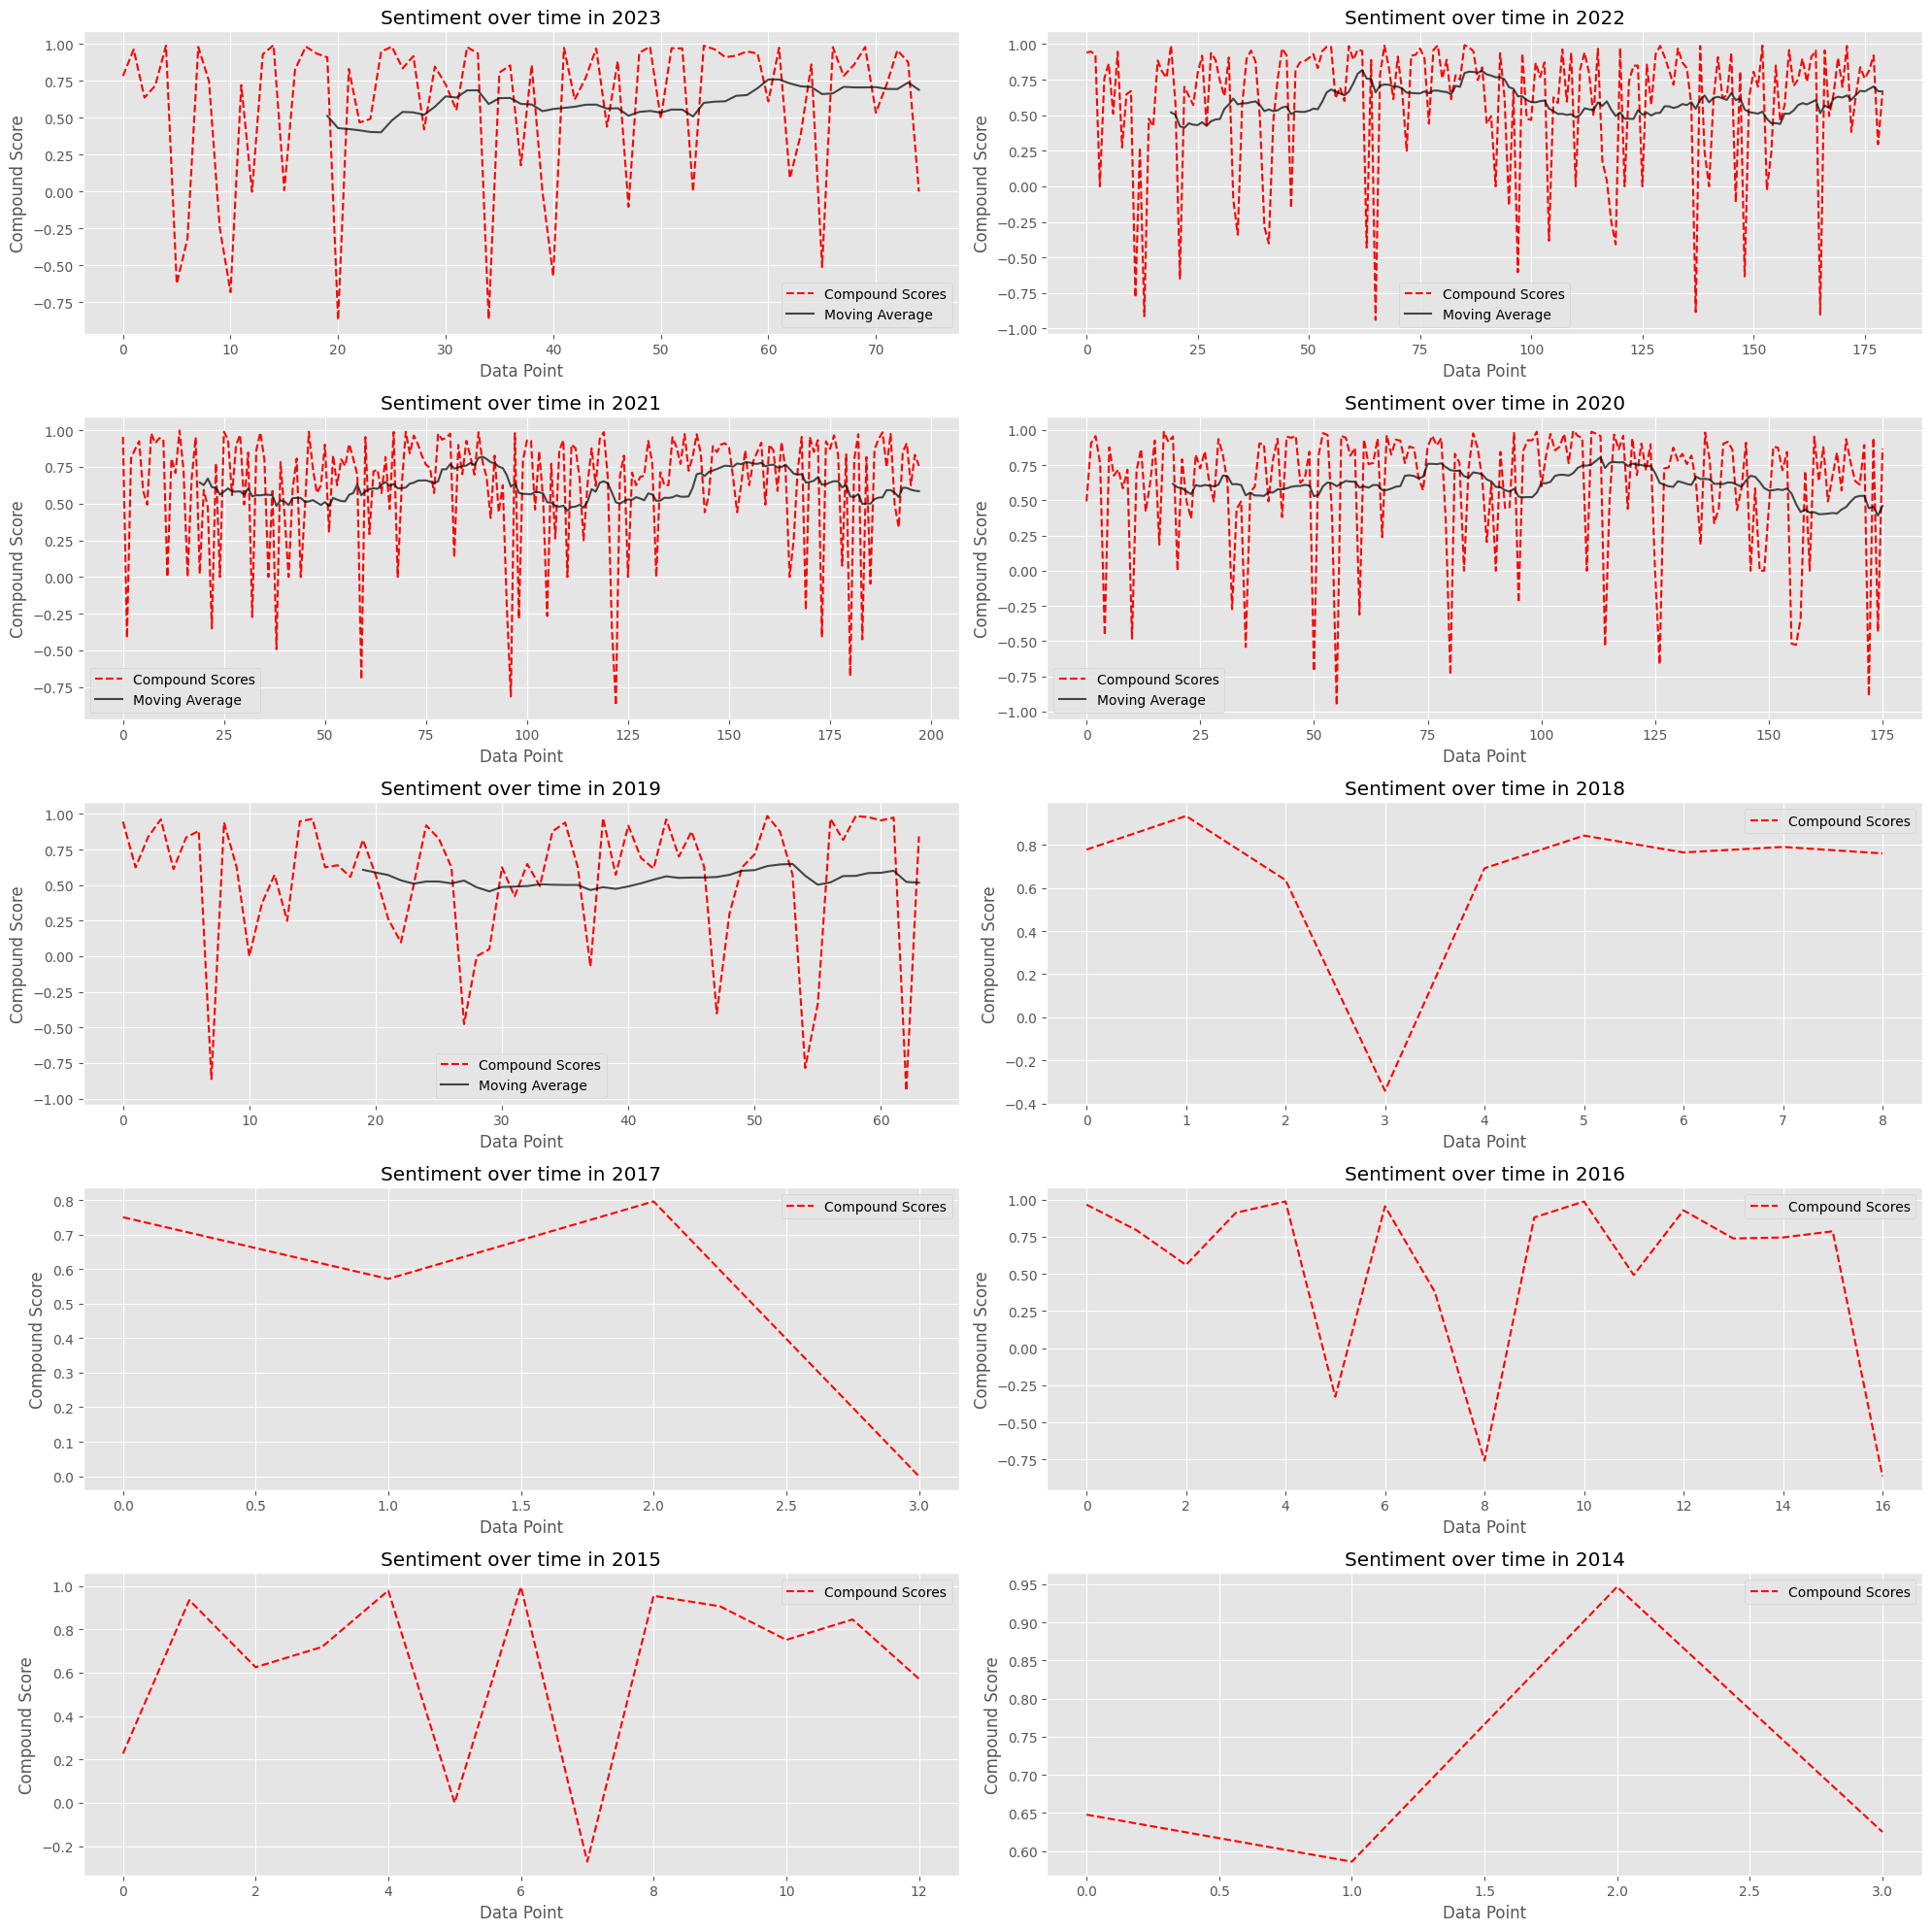

In [ ]:
# not right since do not have days
# barplots of each year are better

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
ax = ax.flatten()

for i, year in enumerate(vaders['Date'].dt.year.unique()):  # Use 'dt.year' to extract the year from the 'Date' column
    # Filter data for the year
    year_data = vaders[vaders['Date'].dt.year == year]['compound'].tolist()
    # Calculate moving average
    if len(year_data) > 60:         # 60 chosen by inspecting how many observations i had for each year
        moving_avg = pd.Series(year_data).rolling(window=20).mean()

        ax[i].plot(year_data, color="red", linestyle='dashed', label='Compound Scores')
        ax[i].plot(moving_avg, color='black', alpha=0.7, label='Moving Average')
        ax[i].set_title(f'Sentiment over time in {year}')
        ax[i].set_xlabel('Data Point')
        ax[i].set_ylabel('Compound Score')
        ax[i].legend()
    
    else:
        ax[i].plot(year_data, color="red", linestyle='dashed', label='Compound Scores')
        ax[i].set_title(f'Sentiment over time in {year}')
        ax[i].set_xlabel('Data Point')
        ax[i].set_ylabel('Compound Score')
        ax[i].legend()

plt.tight_layout()
plt.show()


## RoBERTa

### The Transformers Pipeline

In [ ]:
# from transformers import pipeline

# sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline = ('phrase')